In [1]:
from Stable_SSM_EM import *
import numpy as np
import pandas as pd
from Utilities import *
from ModelTest import loadTestSets

In [2]:
colors = 2*[c["color"] for c in plt.rcParams["axes.prop_cycle"]]

## Load Feather data

In [3]:
# Info on what's available
feather_wsns = ["ktl", "grzl"]

# Choose a network
df_feather_ktl = pd.read_csv("../output/feather/%s.csv" % feather_wsns[0])
times = pd.to_datetime(df_feather_ktl["time"])

# Extract values
y_sd_raw = df_feather_ktl[["snowdepth_%i" % s for s in range(1, 12)]].values
y_t_raw = df_feather_ktl[["air_temp_%i" % s for s in range(1, 12)]].values
y_rh_raw = df_feather_ktl[["rel_humidity_%i" % s for s in range(1, 12)]].values

In [17]:
n_LF = 1
sensors = [0]#, 1, 3]
max_it = 100

ti, tf = 15040, 15240
Y = y_sd_raw[ti:tf, sensors].T

# Set controls
U = np.zeros([1, tf-ti])
V = np.ones([1, tf-ti]) # should be ones

X_hat, sigma_smooth, sigma_filt, A, B, C, D, Q, R, pi0, sigma0 = ssm_em_stable(Y, U, V, n_LF, max_it)

Y_hat = np.dot(C, X_hat) + np.dot(D, V)

(0, 200)

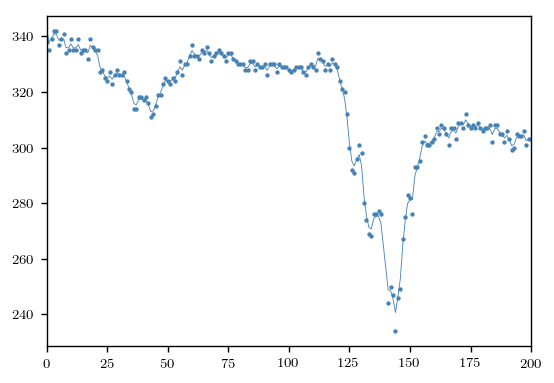

In [18]:
for s, c in zip(range(len(sensors)), colors):
    plt.plot(Y_hat[s, :], '-', linewidth=0.5, color=c)
    plt.plot(Y[s, :], '.', markersize=3.0, color=c)

plt.xlim(0, tf-ti)

In [19]:
print A, "\n\n", C, "\n\n", D, "\n\n", R

[[ 0.98434258]] 

[[ 2.7357527]] 

[[ 308.34150925]] 

[[ 4.77632772]]


In [13]:
print np.linalg.eigvals(sigma_filt[0:5, :, :]), "\n"
print np.linalg.eigvals(sigma_smooth[0:5, :, :])

[[ 0.05773682  0.01124373]
 [ 0.72296573  0.25620096]
 [ 0.93238814  0.26903444]
 [ 0.98629738  0.26956612]
 [ 0.99894617  0.26959866]] 

[[ 0.05695628  0.01112946]
 [ 0.60876933  0.20858341]
 [ 0.74792062  0.21724977]
 [ 0.78213236  0.21760285]
 [ 0.79011852  0.21762002]]


## Checking PCA-only result

(0, 200)

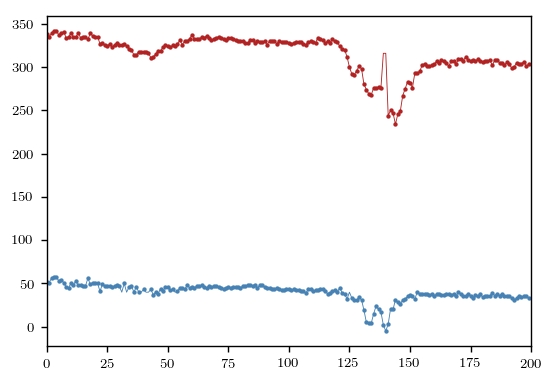

In [70]:
Y_mean = np.nanmean(Y, axis=1).reshape(-1, 1)
C, X_PCA, Y_imp = pca_est_MD(Y - Y_mean, n_LF, max_it)

for s, c in zip(range(len(sensors)), colors):
    plt.plot(Y_imp[s, :] + Y_mean[s], '-', linewidth=0.5, color=c)
    plt.plot(Y[s, :], '.', markersize=3.0, color=c)
    
plt.xlim(0, tf-ti)

In [ ]:
#ti, tf = 27005, 27500
#ti, tf = 27015, 27055 # ~ night
#ti, tf = 27065, 27105 # ~ day
ti, tf = 15005, 15205 # ~ 2 full days

plt.plot(y_sd_raw[ti:tf, :])

## Scratch work

In [ ]:
nan_sensors, nan_times = np.where(np.isnan(Y))
obs_sensors, obs_times = np.where(~np.isnan(Y))

In [ ]:
E_y = Y.copy()
E_y[nan_sensors, nan_times] = (np.dot(C, X_hat) + np.dot(D, V))[nan_sensors, nan_times]

In [ ]:
Y_residual = Y - Y_hat

In [ ]:
plt.plot(Y_residual.T)